In [13]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
from scipy.stats import ttest_ind
import seaborn
import matplotlib.pyplot as plt

In [19]:
!tar -xvzf inno_stats.tar.gz

x 09_groups.csv
x 10_groups.csv
x 11_groups.csv
x product_groups.csv


In [2]:
!ls

09_groups.csv         data                  product_groups.csv
10_groups.csv         inno_stats.tar.gz     requirements.txt
11_groups.csv         lab1.ipynb            suspected_ids.pkl.bz2
Homework #1.1.ipynb   lab2.1.ipynb          venv
Homework #2.ipynb     lab2.2.ipynb
bad_ids.csv           lab2.lbe.ipynb


In [3]:
bad_ids = pd.read_csv('bad_ids.csv')

In [4]:
bad_ids.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


In [5]:
bad_ids_set = set(bad_ids['id_card'])

In [6]:
df = pd.read_csv('09_groups.csv')

In [7]:
df.count

<bound method DataFrame.count of                          date    id_doc  id_order  id_card  id_tov  id_kontr  \
0         2020-09-01 17:01:25   1283228       0.0  1538855      52       271   
1         2020-09-01 17:35:36   8873113       0.0   267307      52       271   
2         2020-09-01 19:19:21  12712899       0.0   610220      52       271   
3         2020-09-01 21:53:34  21535283       0.0   441497      52       271   
4         2020-09-01 18:42:31    642341       0.0  1065358      61        97   
...                       ...       ...       ...      ...     ...       ...   
42100853  2020-09-30 11:26:28   4850561       0.0  1739990   25292     17528   
42100854  2020-09-30 08:12:39  10015419       0.0  1761351   30740     19188   
42100855  2020-09-30 09:54:24  22816791       0.0  1432778   30741     19188   
42100856  2020-09-30 12:00:04   1648929       0.0   484390   34835     15916   
42100857  2020-09-30 09:37:16  22302533       0.0   557627   34835     15916   

      

In [8]:
df_cleaned = df[~df['id_card'].isin(bad_ids_set)]

In [9]:
df_cleaned.count

<bound method DataFrame.count of                          date    id_doc  id_order  id_card  id_tov  id_kontr  \
0         2020-09-01 17:01:25   1283228       0.0  1538855      52       271   
1         2020-09-01 17:35:36   8873113       0.0   267307      52       271   
2         2020-09-01 19:19:21  12712899       0.0   610220      52       271   
3         2020-09-01 21:53:34  21535283       0.0   441497      52       271   
4         2020-09-01 18:42:31    642341       0.0  1065358      61        97   
...                       ...       ...       ...      ...     ...       ...   
42100853  2020-09-30 11:26:28   4850561       0.0  1739990   25292     17528   
42100854  2020-09-30 08:12:39  10015419       0.0  1761351   30740     19188   
42100855  2020-09-30 09:54:24  22816791       0.0  1432778   30741     19188   
42100856  2020-09-30 12:00:04   1648929       0.0   484390   34835     15916   
42100857  2020-09-30 09:37:16  22302533       0.0   557627   34835     15916   

      

In [11]:
p_g = pd.read_csv('./product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [47]:
# Number of positions which were bought with discount card
number_of_discounted_positions = len(df_cleaned[df_cleaned['is_green'] == 1])
number_of_discounted_positions

2611563

In [34]:
# Checks that were paid with a discount card
discount_checks = df_cleaned[df_cleaned['is_green'] == 1].groupby(by=['id_doc']).sum()['sum']
discount_checks.head()

id_doc
19     165.0
60      54.6
76     114.6
138     93.0
152     99.6
Name: sum, dtype: float64

In [35]:
# Mean discounted check
discount_checks.mean()

190.68263650307046

In [48]:
# Checks that were paid without a discount card
non_discount_checks = (
    df_cleaned[df_cleaned['is_green'] == 0]
        .sample(n=number_of_discounted_positions)
        .groupby(by=['id_doc']).sum()['sum']
    )
non_discount_checks.head()

id_doc
2     178.00
4      32.00
18    155.00
31    143.42
40     89.00
Name: sum, dtype: float64

In [49]:
# Mean with any discounts check
non_discount_checks.mean()

156.45516568185857

In [50]:
# Calculate the T-test for the means of two independent samples of scores.
ttest_ind(discount_checks, non_discount_checks)

Ttest_indResult(statistic=162.7144960274809, pvalue=0.0)

#### P-Value is low, therefore we reject the null hypothesis of equal averages. Therefore discounted checks in average higher than checks without discounts.

#### Prove!!!

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [52]:
# Make date column as index column in dataframe
df_cleaned.index = pd.to_datetime(df_cleaned['date'],format='%Y-%m-%d %H:%M:%S')
df_cleaned

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
date,,,,,,,,,,
2020-09-01 17:01:25,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
2020-09-01 17:35:36,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2020-09-01 19:19:21,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
2020-09-01 21:53:34,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
2020-09-01 18:42:31,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091
...,...,...,...,...,...,...,...,...,...,...
2020-09-30 11:26:28,2020-09-30 11:26:28,4850561,0.0,1739990,25292,17528,1.0,130.00,0,10099
2020-09-30 08:12:39,2020-09-30 08:12:39,10015419,0.0,1761351,30740,19188,2.0,120.00,0,10008
2020-09-30 09:54:24,2020-09-30 09:54:24,22816791,0.0,1432778,30741,19188,1.0,73.00,0,10254


In [53]:
# Dataframe with number of checks per day
number_of_checks_per_day = df_cleaned.groupby(by=[df_cleaned.index.day])['id_doc'].count()

In [71]:
number_of_checks_per_day = number_of_checks_per_day.to_frame().rename(columns={'id_doc': 'count'})
number_of_checks_per_day.head()

,count
date,
1,1269893
2,1285415
3,1287425
4,1270192
5,1053459


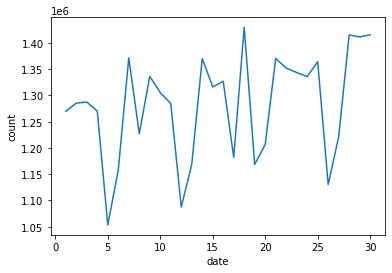

In [76]:
g = seaborn.lineplot(data=number_of_checks_per_day, x="date", y="count")

#### We can see that after the 5th and 20th there is a sharp increase in the number of checks. Consequently, on payday, people go to the stores to buy food

#### Prove

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Orders amount - The customers grouped by the total numer of orders 
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

In [77]:
# Frequent buyers
frequent_buyers = df_cleaned.groupby(by=['id_doc'])
frequent_buyers

In [102]:
# Orders amount
grouped_by_user = df_cleaned.groupby(by=['id_card'])
number_of_orders_per_user = grouped_by_user.agg({"id_doc": "nunique"})
number_of_orders_per_user.head()
grouped_by_number_of_orders = number_of_orders_per_user.groupby(by=['id_doc'])
grouped_by_number_of_orders.groups

{1: [1, 2, 7, 9, 13, 18, 29, 40, 44, 58, 60, 62, 76, 85, 86, 87, 101, 114, 116, 124, 153, 182, 186, 190, 196, 205, 217, 223, 225, 229, 244, 254, 263, 274, 276, 278, 279, 308, 311, 313, 316, 323, 332, 337, 371, 372, 373, 380, 383, 385, 386, 387, 389, 397, 401, 402, 411, 415, 416, 417, 418, 426, 431, 433, 437, 443, 445, 446, 448, 453, 454, 458, 460, 461, 470, 475, 476, 478, 490, 493, 503, 504, 507, 514, 530, 534, 543, 555, 557, 561, 562, 564, 579, 598, 607, 608, 609, 610, 613, 614, ...], 2: [8, 21, 24, 33, 89, 111, 132, 148, 164, 206, 250, 260, 269, 270, 289, 291, 318, 348, 425, 427, 436, 440, 442, 450, 456, 466, 467, 486, 513, 518, 523, 546, 559, 563, 577, 581, 582, 584, 592, 595, 601, 625, 638, 643, 647, 654, 716, 719, 737, 742, 748, 754, 764, 789, 790, 802, 809, 821, 822, 853, 854, 867, 885, 889, 900, 901, 903, 908, 938, 942, 952, 963, 965, 968, 970, 975, 978, 995, 1003, 1016, 1028, 1029, 1045, 1048, 1052, 1065, 1066, 1075, 1101, 1107, 1115, 1125, 1135, 1156, 1157, 1182, 1207, 1211, 1

id_group
-9999     [1672691, 82434, 954793, 1572538, 1408606, 683...
 10004    [1538855, 267307, 610220, 441497, 389692, 3110...
 10005    [31109, 511852, 1254751, 563773, 736602, 16969...
 10008    [1360897, 954793, 1841743, 626319, 389640, 924...
 10012    [1572538, 297933, 149795, 469039, 1318057, 172...
                                ...                        
 10481    [178771, 245508, 518187, 73808, 175105, 161914...
 10499    [552726, 1220525, 294237, 303445, 742939, 2720...
 10503    [766318, 609754, 1822326, 1448679, 106364, 149...
 10506    [128411, 28540, 232592, 1306012, 499888, 17956...
 52194    [686029, 125830, 227162, 890413, 334262, 81074...
Name: id_card, Length: 164, dtype: object


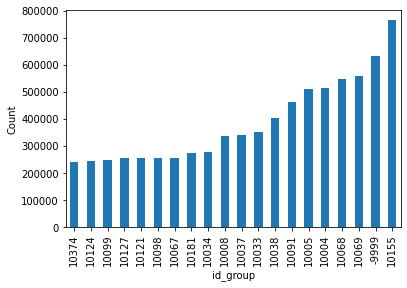

In [23]:
# Usual cart
number_of_cusomers_per_group = df_cleaned.groupby(by=['id_group'])['id_card'].unique().apply(len)
number_of_cusomers_per_group.sort_values()[-20:].plot(kind='bar')
print(df_cleaned.groupby(by=['id_group'])['id_card'].unique())
plt.ylabel('Count');